# Задание 1

Добавляем библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

Создаём функцию для вывода текста

In [116]:
def format_complex_exp(z):
    amplitude = abs(z)
    phase = cmath.phase(z)*180/np.pi
    return f"{amplitude:.10f} * e^({phase:.2f})"

Задаём постоянные и переменные

In [ ]:
e = 2.7182818284590452353602874713526624977572
V_l = 127
Z_ph1 = 3 + 9j
Z_ph2 = -6j
V_ph = V_l/(3)**0.5
EA = V_ph * e**(0j)
EB = V_ph * e**(-120j*np.pi/180)
EC = V_ph * e**(120j*np.pi/180)
EA_angle = np.angle(EA)
EB_angle = np.angle(EB)
EC_angle = np.angle(EC)

Считаем напряжения

In [ ]:
print(format_complex_exp(EA))
print(format_complex_exp(EB))
print(format_complex_exp(EC))

73.3234841871 * e^(0.0000000000j)
73.3234841871 * e^(-2.0943951024j)
73.3234841871 * e^(2.0943951024j)


In [ ]:
Volatage_input = {
    '$E_{A}$': {'magnitude': abs(EA), 'angle': np.angle(EA), 'color': 'orange'},
    '$E_{B}$': {'magnitude': abs(EB), 'angle': np.angle(EB), 'color': 'green'},
    '$E_{C}$': {'magnitude': abs(EC), 'angle': np.angle(EC), 'color': 'red'},
}

In [139]:
def create_vector_diagram_text(dict_name):
    start_point_x = 0
    start_point_y = 0


    for name, params in dict_name.items():
        magnitude = params['magnitude']
        angle = params['angle']
        color = params['color']

        # Построение вектора
        plt.quiver(start_point_x, start_point_y, magnitude * np.cos(angle), magnitude * np.sin(angle),
                  angles='xy', scale_units='xy', scale=1, color=color, label=name)

        # Подпись вектора в его конечной точке
        end_x = start_point_x + magnitude * np.cos(angle) / 2
        end_y = start_point_y + magnitude * np.sin(angle) / 2 + 5
        plt.text(end_x, end_y, name, ha='right', va='bottom', color="black")

        # Обновление начальной точки для следующего вектора
        start_point_x += magnitude * np.cos(angle)
        start_point_y += magnitude * np.sin(angle)

In [140]:
def create_vector_diagram_no_text(dict_name):
    start_point_x = 0
    start_point_y = 0


    for name, params in dict_name.items():
        magnitude = params['magnitude']
        angle = params['angle']
        color = params['color']

        # Построение вектора
        plt.quiver(start_point_x, start_point_y, magnitude * np.cos(angle), magnitude * np.sin(angle),
                  angles='xy', scale_units='xy', scale=1, color=color, label=name)

        # Обновление начальной точки для следующего вектора
        start_point_x += magnitude * np.cos(angle)
        start_point_y += magnitude * np.sin(angle)

Для проверки строим график

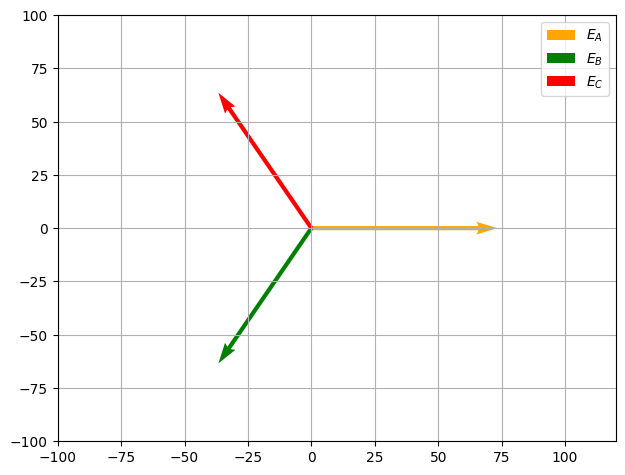

In [141]:
plt.quiver(0, 0, abs(EA) *np.cos(EA_angle), abs(EA) *np.sin(EA_angle), angles='xy', scale_units='xy', scale=1,
           color='orange',
           label='$E_A$')
plt.quiver(0, 0, abs(EB) *np.cos(EB_angle), abs(EB) *np.sin(EB_angle), angles='xy', scale_units='xy', scale=1,
           color='green',
           label='$E_B$')
plt.quiver(0, 0, abs(EC) *np.cos(EC_angle), abs(EC) *np.sin(EC_angle), angles='xy', scale_units='xy', scale=1,
           color='red',
           label='$E_C$')


plt.tight_layout()
plt.legend()
plt.xlim(-100, 120) # предел по x откуда и до куда
plt.ylim(-100, 100) # предел по y
plt.grid()

Теперь построим из конца напряжений

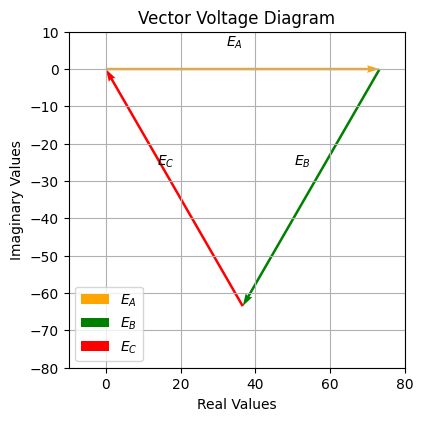

In [142]:
create_vector_diagram_text(Volatage_input)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-10, 80)
plt.ylim(-80, 10)

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Расчёт тока в эквивалентной звезде \\
$
\dot{I}_{A} = \dfrac{\dot{E_{A}}}{Z_{n2}} \\
\dot{I}_{B} = \dfrac{\dot{E_{B}}}{Z_{n2}} \\
\dot{I}_{C} = \dfrac{\dot{E_{C}}}{Z_{n2}}
$

Рассчитываем токи

In [ ]:
I_A = EA/(2.3-3.6j)
I_B = EB/(2.3-3.6j)
I_C = EC/(2.3-3.6j)

In [137]:
Currents_input = {
    '$I_{A}$': {'magnitude': abs(I_A), 'angle': np.angle(I_A), 'color': 'orange'},
    '$I_{B}$': {'magnitude': abs(I_B), 'angle': np.angle(I_B), 'color': 'green'},
    '$I_{C}$': {'magnitude': abs(I_C), 'angle': np.angle(I_C), 'color': 'red'},
}

Для проверки строим

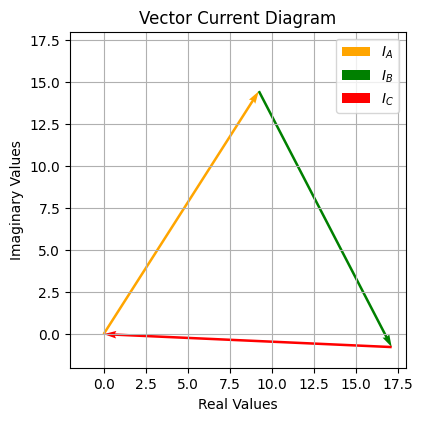

In [148]:
create_vector_diagram_no_text(Currents_input)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-2, 18)
plt.ylim(-2, 18)

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Ток одинаковый как на $\underline{Z_{l}}$ так и на $\underline{Z_{n1}}$ \\
Поэтому посчитаем напряжение на $\underline{Z_{n1}}$ \\
$
\dot{U}_{an1} = \dot{I_A} \cdot \underline{Z_{n1}} \\
\dot{U}_{bn1} = \dot{I_B} \cdot \underline{Z_{n1}} \\
\dot{U}_{cn1} = \dot{I_C} \cdot \underline{Z_{n1}} \\
$

In [ ]:
Z_n1 = 2 - 4j
Z_l = 0.3 + 0.4j

U_an1 = I_A * Z_n1
U_bn1 = I_B * Z_n1
U_cn1 = I_C * Z_n1

U_an1l = I_A * Z_l
U_bn1l = I_B * Z_l
U_cn1l = I_C * Z_l

In [ ]:
Voltages_abcn = {
    '$U_{an1}$': {'magnitude': abs(U_an1), 'angle': np.angle(U_an1), 'color': 'darkorange'},
    '$U_{an1l}$': {'magnitude': abs(U_an1l), 'angle': np.angle(U_an1l), 'color': 'tan'},
    '$U_{bn1}$': {'magnitude': abs(U_bn1), 'angle': np.angle(U_bn1), 'color': 'darkolivegreen'},
    '$U_{bn1l}$': {'magnitude': abs(U_bn1l), 'angle': np.angle(U_bn1l), 'color': 'lime'},
    '$U_{cn1}$': {'magnitude': abs(U_cn1), 'angle': np.angle(U_cn1), 'color': 'darkred'},
    '$U_{cn1l}$': {'magnitude': abs(U_cn1l), 'angle': np.angle(U_cn1l), 'color': 'lightcoral'},
}

Voltages_abcnl = {
    '$U_{an1l}$': {'magnitude': abs(U_an1l), 'angle': np.angle(U_an1l), 'color': 'orange'},
    '$U_{bn1l}$': {'magnitude': abs(U_bn1l), 'angle': np.angle(U_bn1l), 'color': 'green'},
    '$U_{cn1l}$': {'magnitude': abs(U_cn1l), 'angle': np.angle(U_cn1l), 'color': 'red'},
}

Построим векторную диаграмму для проверки

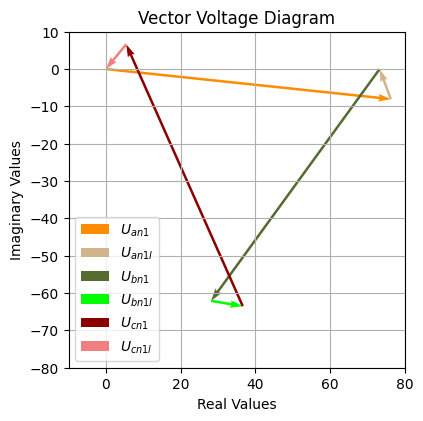

In [144]:
create_vector_diagram_no_text(Voltages_abcn)


plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-10, 80)
plt.ylim(-80, 10)

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

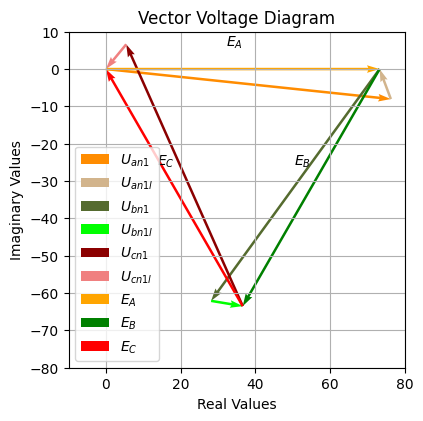

In [145]:
create_vector_diagram_no_text(Voltages_abcn)
create_vector_diagram_text(Volatage_input)


plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-10, 80)
plt.ylim(-80, 10)

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Как видим всё верно, теперь мы знаем напряжение на эквивалентных участках цепи звезды

Теперь найдём напряжение между точками a и b \\
Воспользуемся вторым законом Кирхгофа \\
$
\dot{U}_{ab} - \dot{I}_B \cdot \underline{Z_l} + \dot{I}_A \cdot \underline{Z_l} = \dot{E}_A - \dot{E}_B ⇒ \\
\dot{U}_{ab} = \dot{E}_A - \dot{E}_B + \dot{I}_B \cdot \underline{Z_l} - \dot{I}_A \cdot \underline{Z_l}$ \\
$
\dot{U}_{bc} - \dot{I}_C \cdot \underline{Z_l} + \dot{I}_B \cdot \underline{Z_l} = \dot{E}_B - \dot{E}_C ⇒ \\
\dot{U}_{bc} = \dot{E}_B - \dot{E}_C + \dot{I}_C \cdot \underline{Z_l} - \dot{I}_B \cdot \underline{Z_l} \\
\dot{U}_{ca} - \dot{I}_A \cdot \underline{Z_l} + \dot{I}_C \cdot \underline{Z_l} = \dot{E}_C - \dot{E}_A ⇒ \\
\dot{U}_{ca} = \dot{E}_C - \dot{E}_A + \dot{I}_A \cdot \underline{Z_l} - \dot{I}_C \cdot \underline{Z_l}
$

$
\dot{U}_{ab} = \dot{E}_A - \dot{E}_B + \dot{I}_B \cdot \underline{Z_l} - \dot{I}_A \cdot \underline{Z_l} \\
\dot{U}_{bc} = \dot{E}_B - \dot{E}_C + \dot{I}_C \cdot \underline{Z_l} - \dot{I}_B \cdot \underline{Z_l} \\
\dot{U}_{ca} = \dot{E}_C - \dot{E}_A + \dot{I}_A \cdot \underline{Z_l} - \dot{I}_C \cdot \underline{Z_l}
$ \\
Теперь посчитаем

In [ ]:
U_ab = EA - EB + I_B * Z_l - I_A * Z_l
U_bc = EB - EC + I_C * Z_l - I_B * Z_l
U_ca = EC - EA + I_A * Z_l - I_C * Z_l

In [ ]:
Voltages_triangle = {
    '$U_{ab}$': {'magnitude': abs(U_ab), 'angle': np.angle(U_ab), 'color': 'orange'},
    '$U_{bc}$': {'magnitude': abs(U_bc), 'angle': np.angle(U_bc), 'color': 'green'},
    '$U_{ca}$': {'magnitude': abs(U_ca), 'angle': np.angle(U_ca), 'color': 'red'},
}

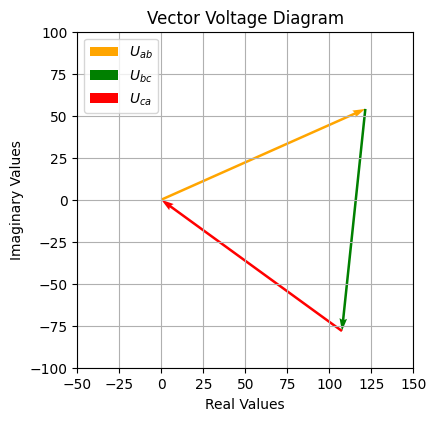

In [ ]:
create_vector_diagram_no_text(Voltages_triangle)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-50, 150)
plt.ylim(-100, 100)

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Теперь зная напряжение между точками в треугольнгике - вернёмся к двум треугольникам и посчитаем токи и напряжения по закону Ома \\
Для фаз приёмника #1 ($\underline{Z_{ph_1}} = 3 + 9j$) \\
И фаз приёмника #2 ($\underline{Z_{ph_2}} = -6j$) \\
$
\dot{I}_{ab1} = \dfrac{U_{ab}}{Z_{ph1}} \\
\dot{I}_{ab2} = \dfrac{U_{ab}}{Z_{ph2}} \\
\dot{I}_{bc1} = \dfrac{U_{bc}}{Z_{ph1}} \\
\dot{I}_{bc2} = \dfrac{U_{bc}}{Z_{ph2}} \\
\dot{I}_{ca1} = \dfrac{U_{ca}}{Z_{ph1}} \\
\dot{I}_{ca2} = \dfrac{U_{ca}}{Z_{ph2}} \\
$

In [ ]:
I_ab1 = U_ab / Z_ph1
I_ab2 = U_ab / Z_ph2

I_bc1 = U_bc / Z_ph1
I_bc2 = U_bc / Z_ph2

I_ca1 = U_ca / Z_ph1
I_ca2 = U_ca / Z_ph2

Выполним проверку токов по первому закону Кирхгофа \\
$
\dot{I}_A = \dot{I}_{ab1} + \dot{I}_{ab2} -\dot{I}_{ca1} - \dot{I}_{ca2}\\
\dot{I}_B = -\dot{I}_{ab1} - \dot{I}_{ab2} + \dot{I}_{bc1} + \dot{I}_{bc2}\\
\dot{I}_C = \dot{I}_{ca1} + \dot{I}_{ca2} - \dot{I}_{bc1} - \dot{I}_{bc2}  
$

In [ ]:
print(I_A)
print(I_ab1 + I_ab2 - I_ca1 - I_ca2)
print(I_B)
print(-I_ab1 - I_ab2 + I_bc1 + I_bc2)
print(I_C)
print(I_ca1 + I_ca2 - I_bc1 - I_bc2)

(9.240767870152858+14.463810579369692j)
(9.240767870152858+14.46381057936969j)
(7.905643462183847-15.23464501571224j)
(7.905643462183848-15.234645015712243j)
(-17.1464113323367+0.7708344363425532j)
(-17.146411332336704+0.7708344363425517j)


Построим диаграмму для этих соотношений

In [173]:
Current = {
    '$I_{ab1}$': {'magnitude': abs(I_ab1), 'angle': np.angle(I_ab1), 'color': 'peru'},
    '$I_{ab2}$': {'magnitude': abs(I_ab2), 'angle': np.angle(I_ab2), 'color': 'gold'},
    '$-I_{ca1}$': {'magnitude': abs(I_ca1), 'angle': np.angle(-I_ca1), 'color': 'khaki'},
    '$-I_{ca2}$': {'magnitude': abs(I_ca2), 'angle': np.angle(-I_ca2), 'color': 'darkorange'},
    '$I_{bc1}$': {'magnitude': abs(I_bc1), 'angle': np.angle(I_bc1), 'color': 'lime'},
    '$I_{bc2}$': {'magnitude': abs(I_bc2), 'angle': np.angle(I_bc2), 'color': 'springgreen'},
    '$-I_{ab1}$': {'magnitude': abs(I_ab1), 'angle': np.angle(-I_ab1), 'color': 'lightgreen'},
    '$-I_{ab2}$': {'magnitude': abs(I_ab2), 'angle': np.angle(-I_ab2), 'color': 'forestgreen'},
    '$I_{ca1}$': {'magnitude': abs(I_ca1), 'angle': np.angle(I_ca1), 'color': 'lightcoral'},
    '$I_{ca2}$': {'magnitude': abs(I_ca2), 'angle': np.angle(I_ca2), 'color': 'darkred'},
    '$-I_{bc1}$': {'magnitude': abs(I_bc1), 'angle': np.angle(-I_bc1), 'color': 'tomato'},
    '$-I_{bc2}$': {'magnitude': abs(I_bc2), 'angle': np.angle(-I_bc2), 'color': 'brown'},
}

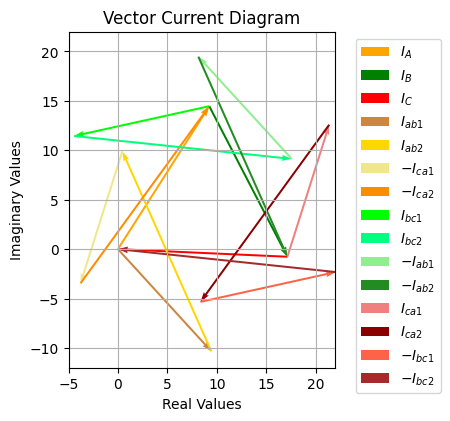

In [179]:
create_vector_diagram_no_text(Currents_input)
create_vector_diagram_no_text(Current)



plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-5, 22)
plt.ylim(-12, 22)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Как видим погрешность появилась на 15 знаке

Теперь можем составить таблицу со всеми значениями



In [ ]:
from tabulate import tabulate

headers = ["Element", "Circuit (A)", "Voltage (V)"]
data = [
    ["$ab 1$", I_ab1, U_ab],
    ["$ab 2$", I_ab2, U_ab],
    ["$bc 1$", I_bc1, U_bc],
    ["$bc 2$", I_bc2, U_bc],
    ["$ca 1$", I_ca1, U_ca],
    ["$ca 2$", I_ca2, U_ca],
    ["$linear A", I_A, U_an1l],
    ["$linear B", I_B, U_bn1l],
    ["$linear C", I_C, U_cn1l],
]

table = tabulate(data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center")

print(table)

╒═══════════╤═══════════════════════════════════════════╤══════════════════════════════════════════╕
│  Element  │                Circuit (A)                │               Voltage (V)                │
╞═══════════╪═══════════════════════════════════════════╪══════════════════════════════════════════╡
│  $ab 1$   │  (9.45444372903764-10.344526667683649j)   │ (121.46407119626576+54.056413558287815j) │
├───────────┼───────────────────────────────────────────┼──────────────────────────────────────────┤
│  $ab 2$   │ (-9.009402259714635+20.244011866044293j)  │ (121.46407119626576+54.056413558287815j) │
├───────────┼───────────────────────────────────────────┼──────────────────────────────────────────┤
│  $bc 1$   │ (-13.685844748858448-3.0155251141552513j) │ (-13.917808219178083-132.2191780821918j) │
├───────────┼───────────────────────────────────────────┼──────────────────────────────────────────┤
│  $bc 2$   │   (22.0365296803653-2.319634703196347j)   │ (-13.917808219178083-132.21917808

Выведем с углами в градусах

In [117]:
from tabulate import tabulate

headers = ["Element", "Circuit (A)", "Voltage (V)"]
data = [
    ["ab 1", format_complex_exp(I_ab1), format_complex_exp(U_ab)],
    ["ab 2", format_complex_exp(I_ab2), format_complex_exp(U_ab)],
    ["bc 1", format_complex_exp(I_bc1), format_complex_exp(U_bc)],
    ["bc 2", format_complex_exp(I_bc2), format_complex_exp(U_bc)],
    ["ca 1", format_complex_exp(I_ca1), format_complex_exp(U_ca)],
    ["ca 2", format_complex_exp(I_ca2), format_complex_exp(U_ca)],
    ["linear A", format_complex_exp(I_A), format_complex_exp(U_an1l)],
    ["linear B", format_complex_exp(I_B), format_complex_exp(U_bn1l)],
    ["linear C", format_complex_exp(I_C), format_complex_exp(U_cn1l)],
    ["Voltage A", format_complex_exp(I_A), format_complex_exp(EA)],
    ["Voltage B", format_complex_exp(I_B), format_complex_exp(EB)],
    ["Voltage C", format_complex_exp(I_C), format_complex_exp(EC)],
]

table = tabulate(data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center")

print(table)

╒═══════════╤═════════════════════════════╤═════════════════════════════╕
│  Element  │         Circuit (A)         │         Voltage (V)         │
╞═══════════╪═════════════════════════════╪═════════════════════════════╡
│   ab 1    │ 14.0141263803 * e^(-47.57)  │ 132.9496763379 * e^(23.99)  │
├───────────┼─────────────────────────────┼─────────────────────────────┤
│   ab 2    │ 22.1582793897 * e^(113.99)  │ 132.9496763379 * e^(23.99)  │
├───────────┼─────────────────────────────┼─────────────────────────────┤
│   bc 1    │ 14.0141263803 * e^(-167.57) │ 132.9496763379 * e^(-96.01) │
├───────────┼─────────────────────────────┼─────────────────────────────┤
│   bc 2    │  22.1582793897 * e^(-6.01)  │ 132.9496763379 * e^(-96.01) │
├───────────┼─────────────────────────────┼─────────────────────────────┤
│   ca 1    │  14.0141263803 * e^(72.43)  │ 132.9496763379 * e^(143.99) │
├───────────┼─────────────────────────────┼─────────────────────────────┤
│   ca 2    │ 22.1582793897 * e^(-126.

Мы посчитали всё через законы Кирхгофа, а если посмотрим на схему, то увидим, что можно было просто использовать сдвиги на $\dfrac{2 \pi}{3}$

Теперь проврим баланс мощности

Создадим функцию для расчёта активной и реактивной мощностей


```
Power_calculation()
```



In [114]:
"""
Power_calculation() calculates power as real and imaginary parts of multiplications voltage on conjucted circuit
"""

def Power_calculation(V, I):
    S = V * np.conj(I)
    P = S.real
    Q = S.imag
    return P, Q

Теперь для каждого элемента посчитаем мощности и проверим баланс

In [128]:
P_E1, Q_E1 = Power_calculation(EA, I_A)
P_E2, Q_E2 = Power_calculation(EB, I_B)
P_E3, Q_E3 = Power_calculation(EC, I_C)

P_linearA, Q_linearA = Power_calculation(U_an1l, I_A)
P_linearB, Q_linearB = Power_calculation(U_bn1l, I_B)
P_linearC, Q_linearC = Power_calculation(U_cn1l, I_C)

P_ab1, Q_ab1 = Power_calculation(U_ab, I_ab1)
P_ab2, Q_ab2 = Power_calculation(U_ab, I_ab2)

P_bc1, Q_bc1 = Power_calculation(U_bc, I_bc1)
P_bc2, Q_bc2 = Power_calculation(U_bc, I_bc2)

P_ca1, Q_ca1 = Power_calculation(U_ca, I_ca1)
P_ca2, Q_ca2 = Power_calculation(U_ca, I_ca2)

Проверим активную мощность

In [132]:
print(P_E1 + P_E2 + P_E3)
print(P_linearA + P_linearB + P_linearC + P_ab1 + P_ab2 + P_bc1 + P_bc2 + P_ca1 + P_ca2)

2032.6958904109583
2032.6958904109586


Как видим она совпала с высокой точностью, теперь проверим реактивную мощность

In [133]:
print(Q_E1 + Q_E2 + Q_E3)
print(Q_linearA + Q_linearB + Q_linearC + Q_ab1 + Q_ab2 + Q_bc1 + Q_bc2 + Q_ca1 + Q_ca2)

-3181.610958904109
-3181.61095890411


Реактивная тоже совпала

Диагамму для проверки мы уже строили, в самом начале для проверки \\
Продублируем код снова

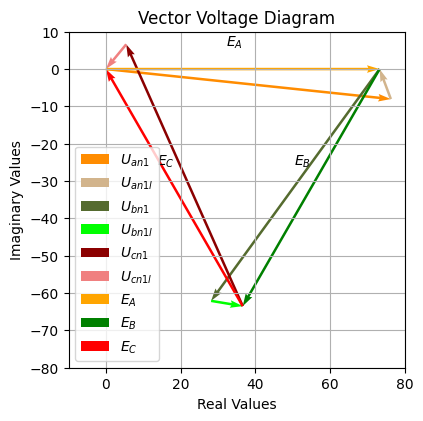

In [136]:
create_vector_diagram_no_text(Voltages_abcn)
create_vector_diagram_text(Volatage_input)


plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-10, 80)
plt.ylim(-80, 10)

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)